##                          Data Science , Machine Learning and Business Analytics Project

Jupyter file drive link: https://drive.google.com/file/d/106n6TsAEK_fm2Y_5VAsfMGT5ecliShYK/view?usp=sharing

Dataset - Wine Quality Dataset. It contains 11 independant features and a target column 'quality' with labels good and bad

### Part A 

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import wine data
data = pd.read_csv('wine.csv')

#### Data Preprocessing and Exploratory Data Analysis

In [3]:
#summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [4]:
data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8    good  
4      9.4     bad  
5      9.4     bad  
6      9.4     bad  
7     10.0    good  
8      9.5    good  
9     10.5     bad

<Axes: xlabel='quality'>

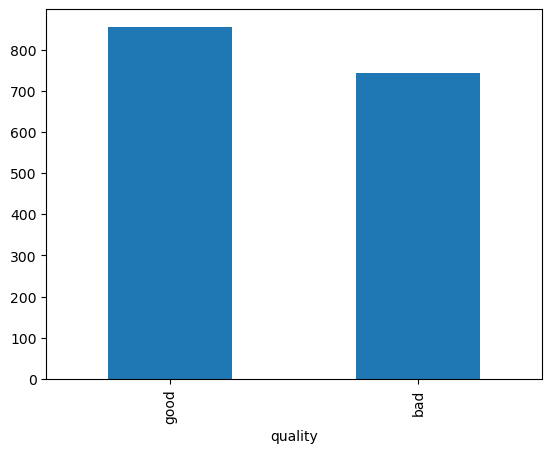

In [5]:
# checking for any imbalance of the labels in target column
data['quality'].value_counts().plot(kind = 'bar')

From the bar graph, There is no imbalance as there is no significant difference in the count of 'good' and 'bad'.

<Axes: >

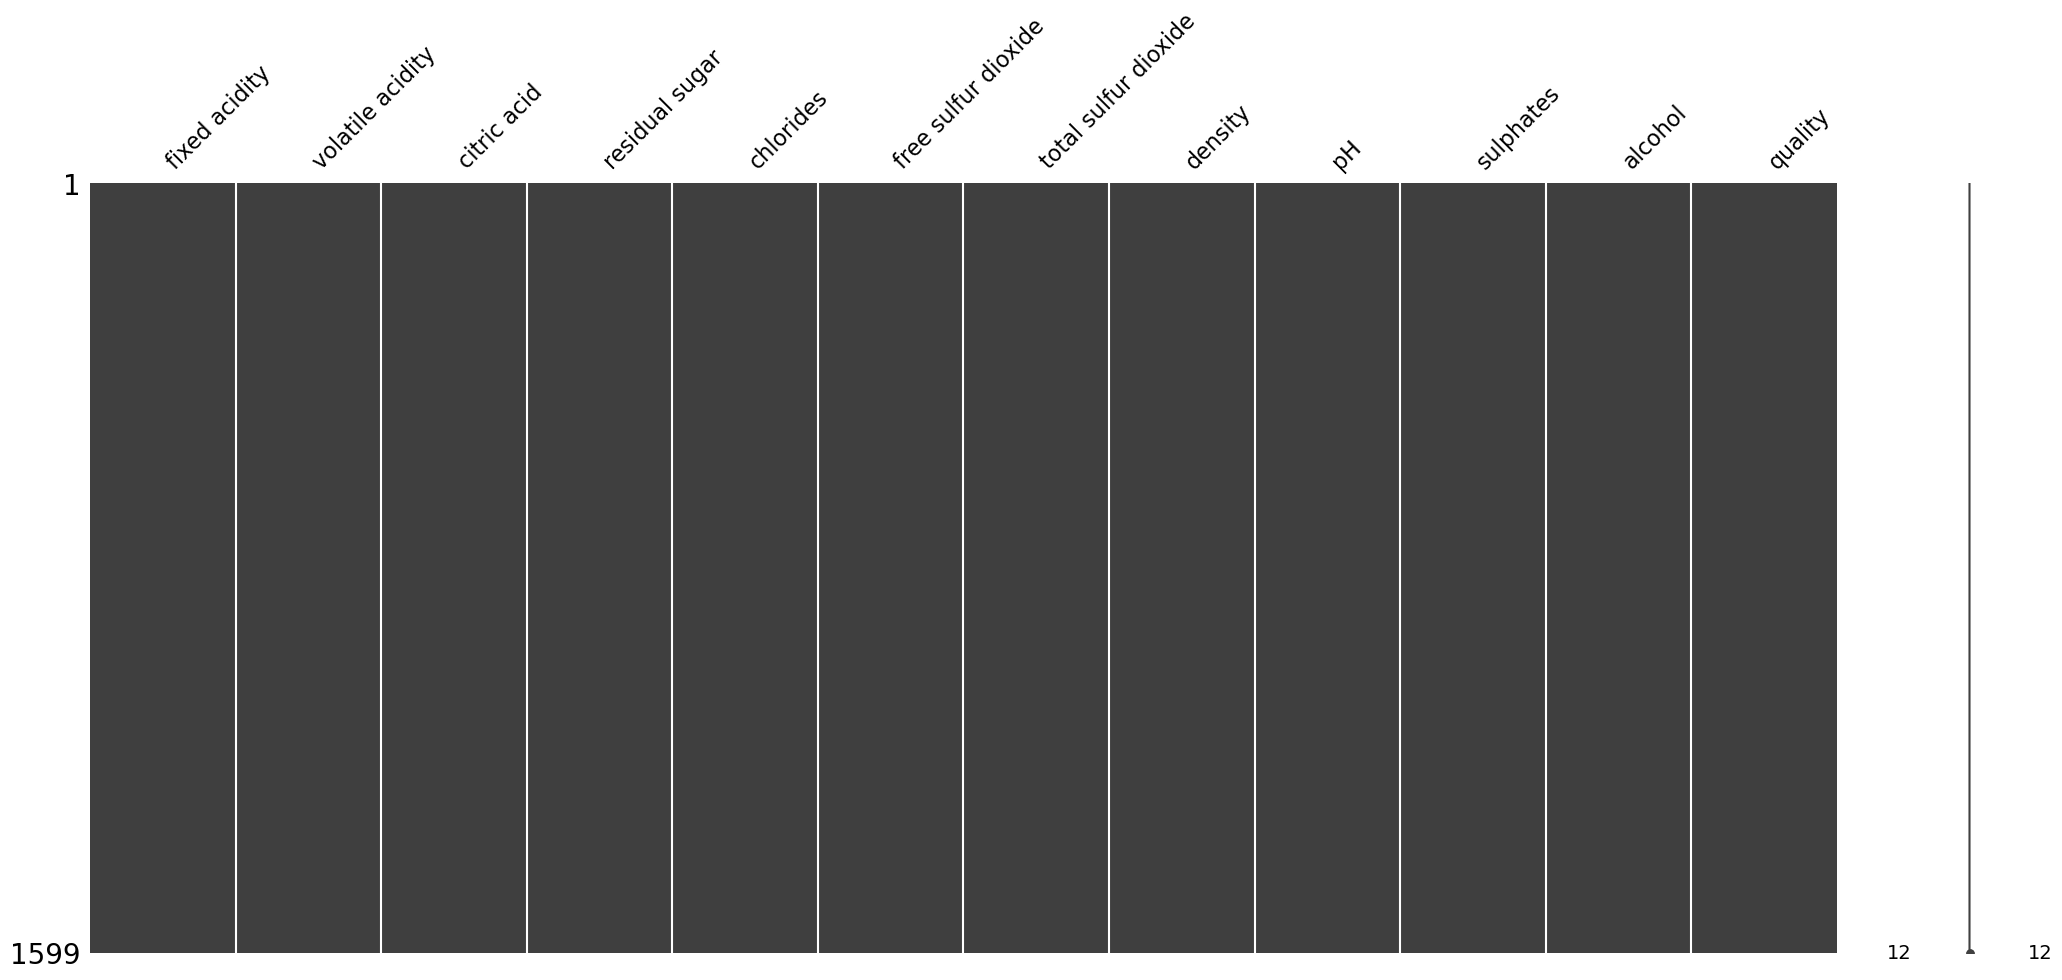

In [6]:
# checking for missing values in the dataset 
import missingno as msn
msn.matrix(data)

There are no missing values in the dataset

In [7]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# encoding target column
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
data['quality'] = lbl.fit_transform(data[['quality']])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
data['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

In [10]:
data['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

Target column 'quality' is encoded, 1 - good, 0 - bad

In [11]:
# Finding correlation between independant variables
data.corr(numeric_only = True)

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.095093         -0.321441     0.159129   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                    -0.002160  -0.109494            -0.061757   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.231963 -0.159110 -0.003264   0.218072   

                       alcohol   quality  
fixed acidity        -0.061668  0.095093  
volatile acidity     -0.202288 -0.321441  
citric acid           0.109903  0.159129  
residual sugar        0.042075 -0.002160  
chlorides            -0.221141 -0.109494  
free sulfur dioxide  -0.069408 -0.061757  
total sulfur dioxide -0.205654 -0.231963  
density              -0.496180 -0.159110  
pH                    0.205633 -0.003264  
sulphates             0.093595  0.218072  
alcohol               1.000000  0.434751  
quality               0.434751  1.000000

<Axes: >

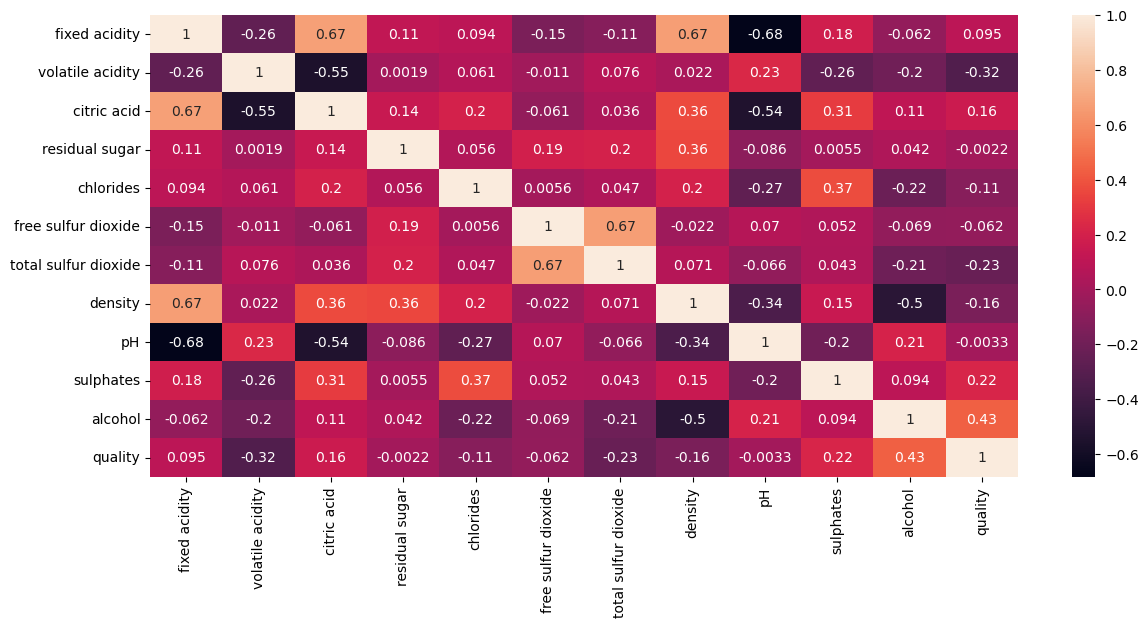

In [12]:
#heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(data.corr(numeric_only = True), annot = True)

Interpretation : From the values of correlation coefficients, 'sulphates' and 'alcohol' have the higher positive correlation with 'quality' compared to other features. 

We can also observe that there are few independant features that are significantly correlated with each other. For example, 'citric acid' and 'fixed acidity' (0.67) whereas 'pH' and 'fixed acidity' are negatively correlated (-0.68). We can include that there is multicollinearity in the data. So, l2 regularizer has to used in classification models.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


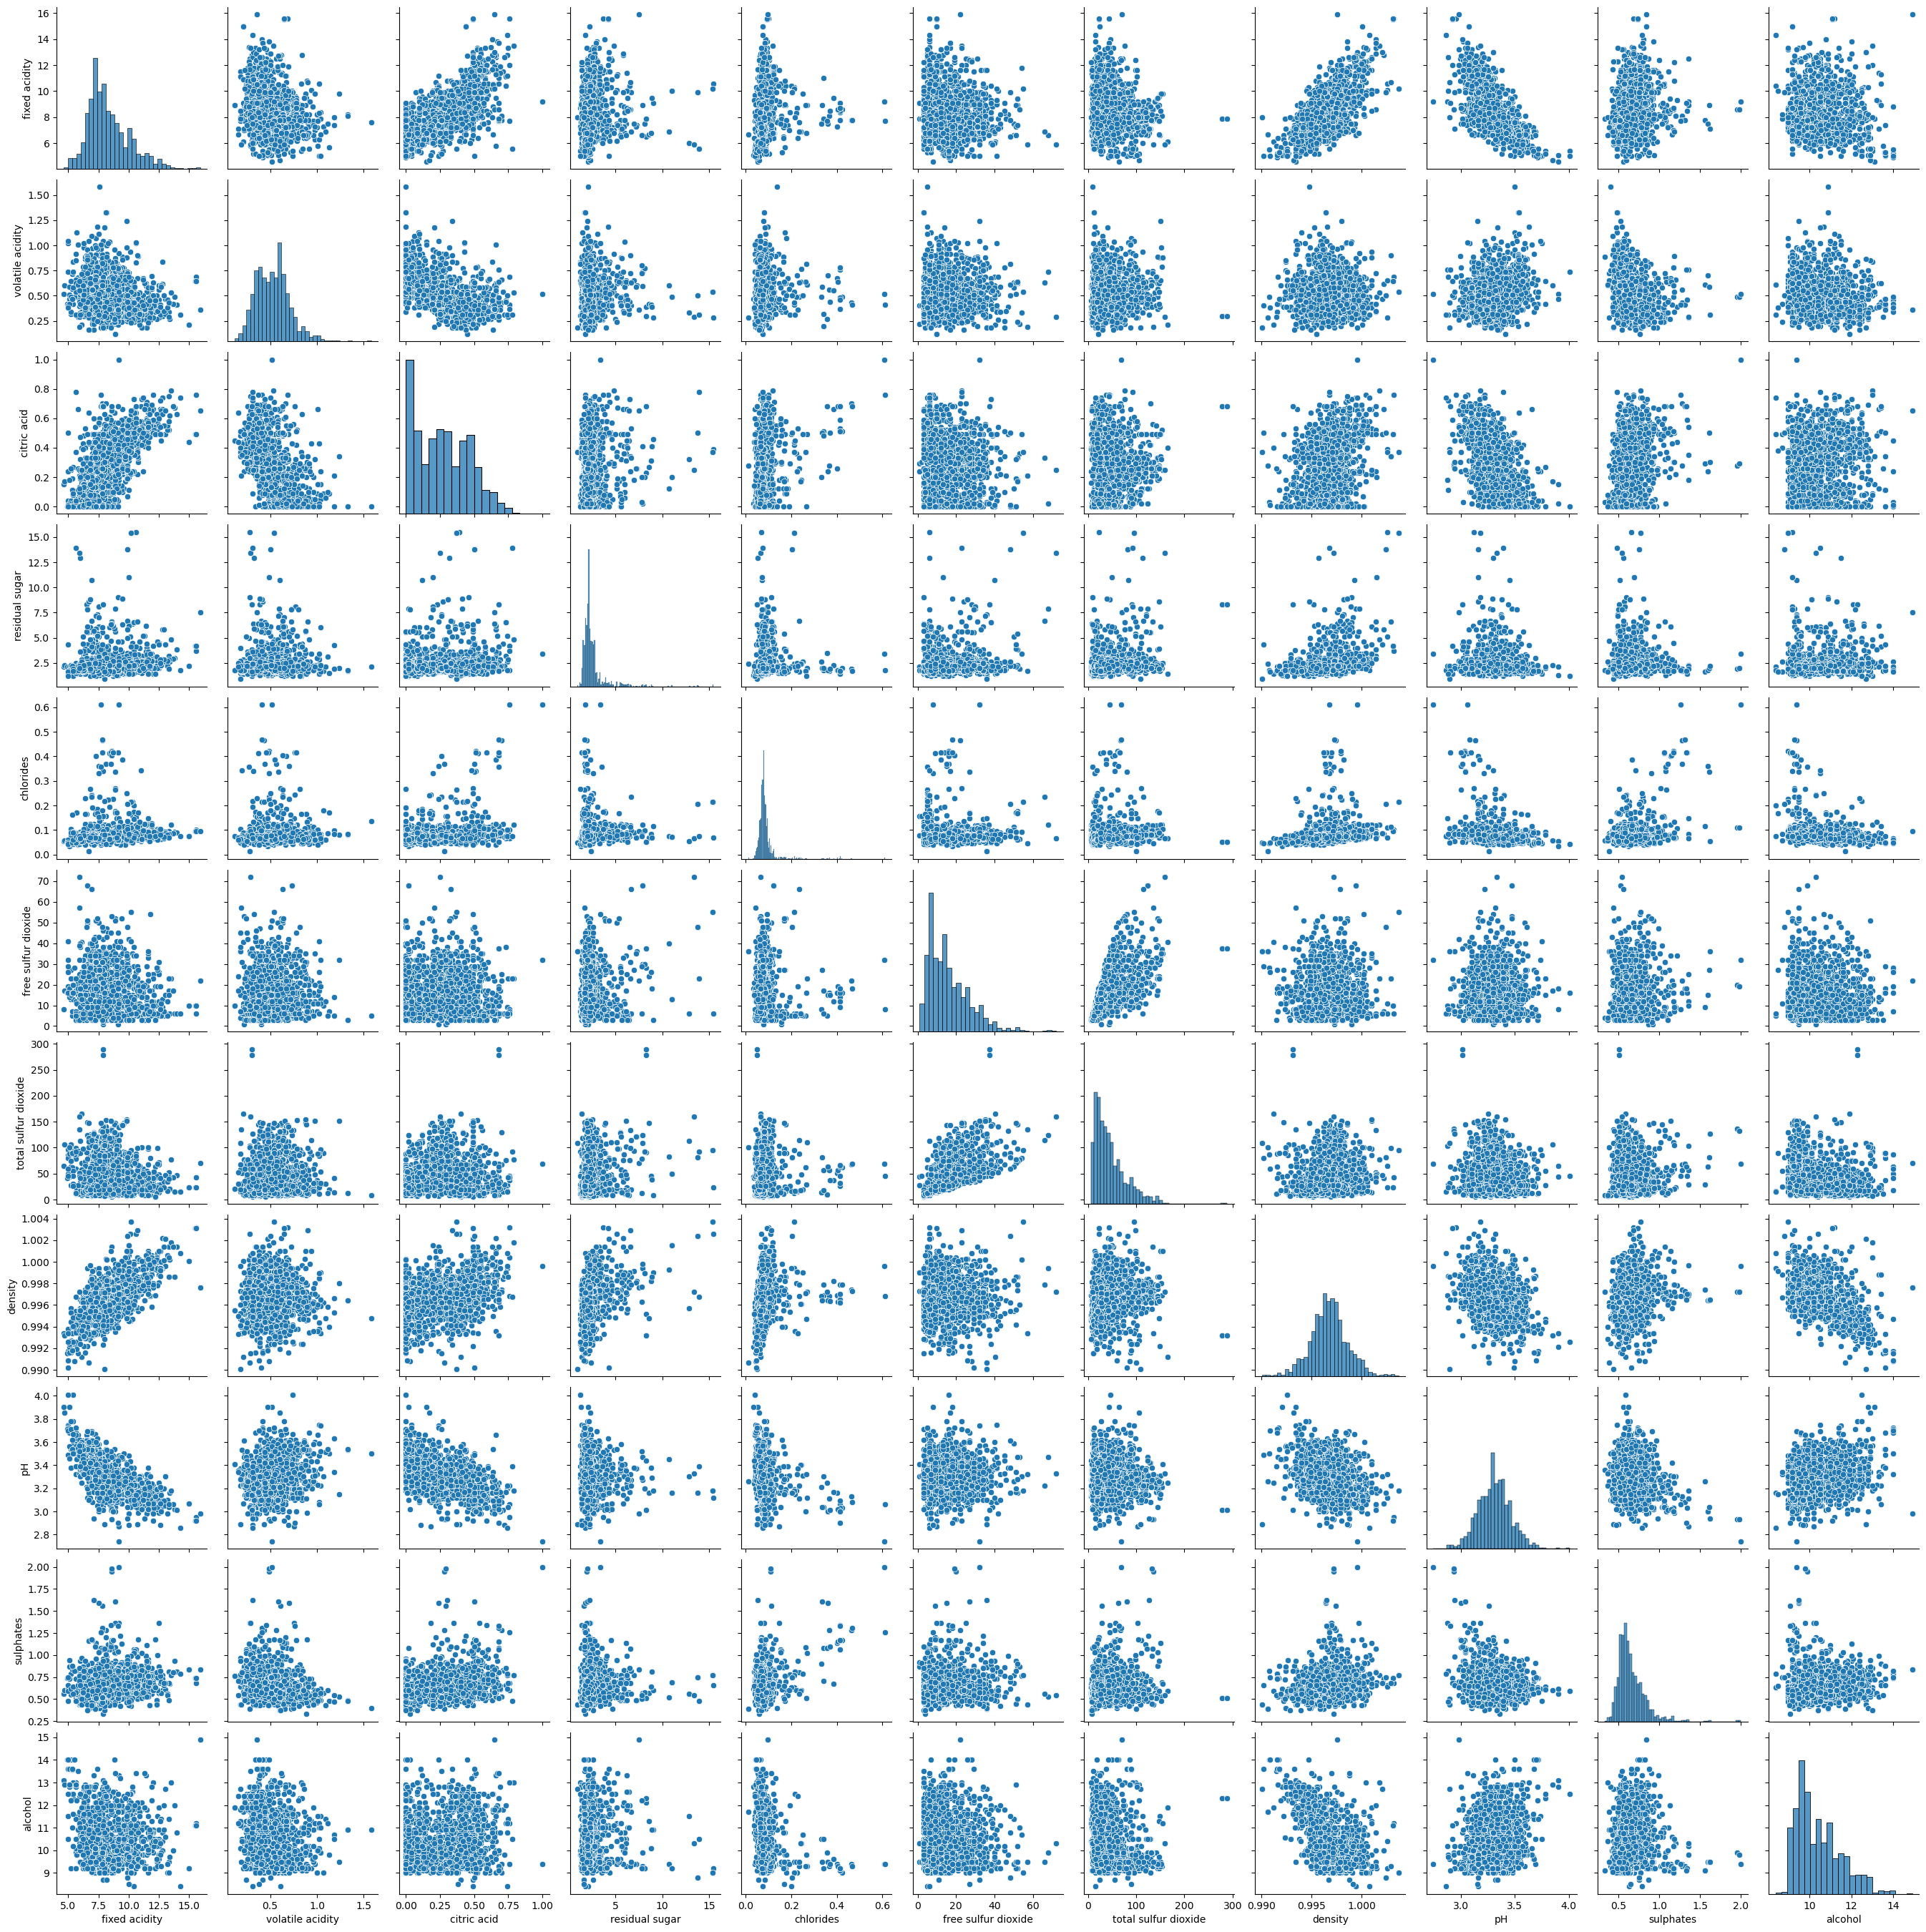

In [13]:
# pairplot to find the correlation among the features and distribution of the features
X = data.drop(['quality'], axis = 1)
sns.pairplot(data = X)

Interpretation: From the histograms, all the features are normally distributed except 'citric acid' and 'free sulfur dioxide'. 'Volatile acidity', 'residual sugar', 'chlorides', 'density' are symmetrically distributed, others are skewed.

#### Feature Selection 

#### Filter Methods

In [14]:
X = data.drop(['quality'], axis = 1)
Y = data['quality']

In [15]:
# apply selectkbest using chi square and mutual information gain to find the most relevant features for classification
from sklearn.feature_selection import mutual_info_classif,SelectKBest,chi2
info_gain=mutual_info_classif(X,Y)
feature_score=SelectKBest(chi2,k='all').fit(X,Y).scores_

In [16]:
missing_ratio=X.isnull().sum()/len(X)

In [17]:
feature_details=pd.DataFrame({'Features':X.columns,'Info Gain':info_gain,
                              'Feature Score':feature_score,
                              'Missing Ratio':missing_ratio})

In [18]:
feature_details.sort_values(by='Info Gain',ascending=False)

Features  Info Gain  Feature Score  \
alcohol                            alcohol   0.107404      32.908633   
sulphates                        sulphates   0.071749       3.317617   
volatile acidity          volatile acidity   0.069381      10.029710   
total sulfur dioxide  total sulfur dioxide   0.057622    2002.305900   
density                            density   0.054235       0.000145   
fixed acidity                fixed acidity   0.036206       5.265257   
citric acid                    citric acid   0.035042       5.666703   
chlorides                        chlorides   0.032187       0.485196   
residual sugar              residual sugar   0.009888       0.005840   
free sulfur dioxide    free sulfur dioxide   0.000000      42.005907   
pH                                      pH   0.000000       0.000123   

                      Missing Ratio  
alcohol                         0.0  
sulphates                       0.0  
volatile acidity                0.0  
total sulfur dioxide            0.0  
density                         0.0  
fixed acidity                   0.0  
citric acid                     0.0  
chlorides                       0.0  
residual sugar                  0.0  
free sulfur dioxide             0.0  
pH                              0.0

Interpretation : From the values of Mutual Information Gain, alcohol, sulphates, volatile acidity, total sulfur dioxide and density are top 5 important features. From the feature score values, total sulpur dioxide is the most important feature followed by free sulfur dioxide and alcohol.

In [19]:
# obtaining fisher scores to find imp. features
def fisher_score(X,Y):
    overall_mean=X.mean()
    classes=Y.unique()
    s_b=0
    s_w=0
    for c in classes:
        X_c=X[Y==c]
        mean_class=X_c.mean()
        s_b+=len(X_c)*(mean_class-overall_mean)**2
        s_w+=((X_c-mean_class)**2).sum()
    fischer_scores=s_b/s_w
    return fischer_scores

In [20]:
f_score=fisher_score(X,Y)
print(f_score)

fixed acidity           0.009125
volatile acidity        0.115230
citric acid             0.025980
residual sugar          0.000005
chlorides               0.012134
free sulfur dioxide     0.003828
total sulfur dioxide    0.056867
density                 0.025974
pH                      0.000011
sulphates               0.049930
alcohol                 0.233059
dtype: float64


Interpretation: alcohol and volatile acidity have the higher fischer score values. 

#### Wrapper Methods

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=1000)

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector

In [24]:
# performing forward selection and backward elimination
forward_select=SequentialFeatureSelector(lr_model,
                                         n_features_to_select='auto',
                                         direction='forward',
                                         scoring='accuracy',cv=5)
backward_select=SequentialFeatureSelector(lr_model,
                                          n_features_to_select='auto',
                                          direction='backward',
                                          scoring='accuracy',cv=5)

In [25]:
forward=forward_select.fit(X_train,Y_train)

In [26]:
selected_forward_features=X_train.columns[forward.get_support()]

In [27]:
print(selected_forward_features)

Index(['volatile acidity', 'citric acid', 'residual sugar',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')


In [28]:
backward=backward_select.fit(X_train,Y_train)
selected_backward_features=X_train.columns[backward.get_support()]
print(selected_backward_features)

Index(['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'alcohol'],
      dtype='object')


In [29]:
!pip install mlxtend

In [30]:
#exhaustive feature selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs=EFS(lr_model,min_features=1,max_features=5,scoring='accuracy',cv=5)
efs=efs.fit(X_train,Y_train)
efs.best_idx_

Features: 1023/1023

(1, 5, 6, 8, 10)

In [31]:
for i in efs.best_idx_:
    print(X_train.columns[i])

volatile acidity
free sulfur dioxide
total sulfur dioxide
pH
alcohol


### Model Implementation - Using all the features 

#### Logistic Regression

In [32]:
#define the model
lr_model = LogisticRegression(penalty = 'l2',  #used as there is multicollinearity observed in the data
                              C = 1.0, 
                              fit_intercept = True, 
                              random_state = None, 
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              multi_class = 'auto', 
                              verbose = 0, 
                              warm_start = False, 
                              n_jobs = None,
                              l1_ratio = None,
                              )

In [33]:
#train the model
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [34]:
# make predictions using test data
lr_pred = lr_model.predict(X_test)
lr_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [36]:
# calculating accuracy, precision, recall and F1_score
accuracy_lr = accuracy_score(Y_test, lr_pred)
precision_lr = precision_score(Y_test, lr_pred)
recall_lr = recall_score(Y_test, lr_pred)
f1_score_lr = f1_score(Y_test, lr_pred)

In [37]:
print('Accuracy:',accuracy_lr, 'Precision:', precision_lr, 'Recall:', recall_lr, 'F1-Score:', f1_score_lr)

Accuracy: 0.740625 Precision: 0.7926829268292683 Recall: 0.7262569832402235 F1-Score: 0.7580174927113703


In [38]:
import numpy as np
np.unique(Y).tolist()

[0, 1]

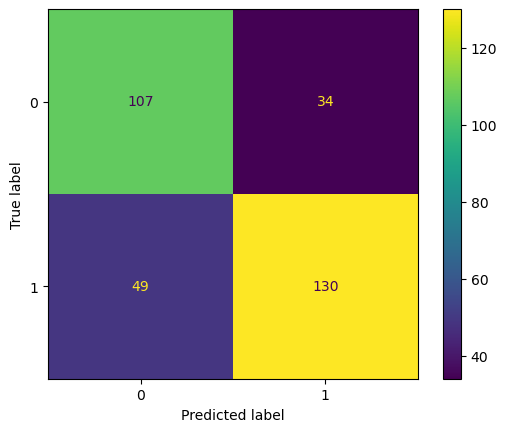

In [39]:
# Confusion matrix
cm_lr = confusion_matrix(Y_test, lr_pred)
cms_lr = ConfusionMatrixDisplay(cm_lr, display_labels = np.unique(Y).tolist())
cms_lr.plot()

In [40]:
#classification report
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



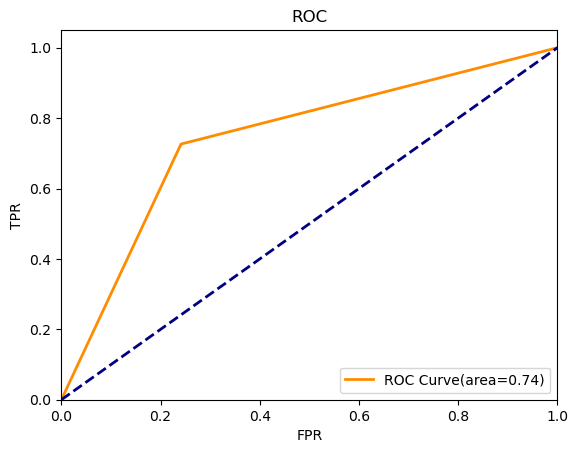

In [41]:
# ROC curve and AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(Y_test,lr_pred,pos_label=1)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

#### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [43]:
dt = DecisionTreeClassifier(criterion = 'gini', 
                            splitter = 'best',
                            max_depth = None, 
                            min_samples_split = 2, 
                            min_samples_leaf = 1, 
                            max_features = None, 
                            random_state = None, 
                            )

In [44]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [45]:
dt_pred = dt.predict(X_test)

In [46]:
# calculating accuracy, precision and recall
accuracy_dt = accuracy_score(Y_test, dt_pred)
precision_dt = precision_score(Y_test, dt_pred)
recall_dt = recall_score(Y_test, dt_pred)

In [47]:
print('Accuracy:',accuracy_dt, 'Precision:', precision_dt, 'Recall:', recall_dt)

Accuracy: 0.715625 Precision: 0.7528735632183908 Recall: 0.7318435754189944


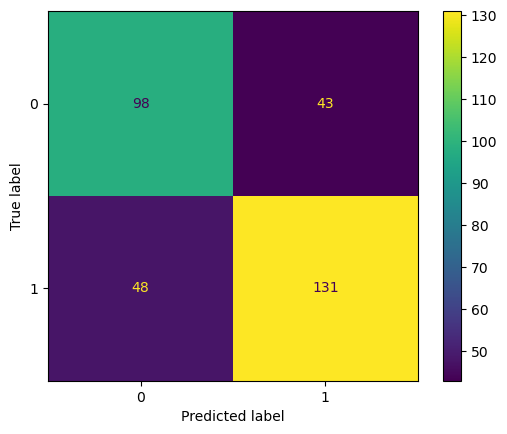

In [48]:
# confusion matrix
cm_dt = confusion_matrix(Y_test, dt_pred)
cms_dt = ConfusionMatrixDisplay(cm_dt, display_labels = np.unique(Y).tolist())
cms_dt.plot()

In [49]:
#classification report
print(classification_report(Y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       141
           1       0.75      0.73      0.74       179

    accuracy                           0.72       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.72      0.72      0.72       320



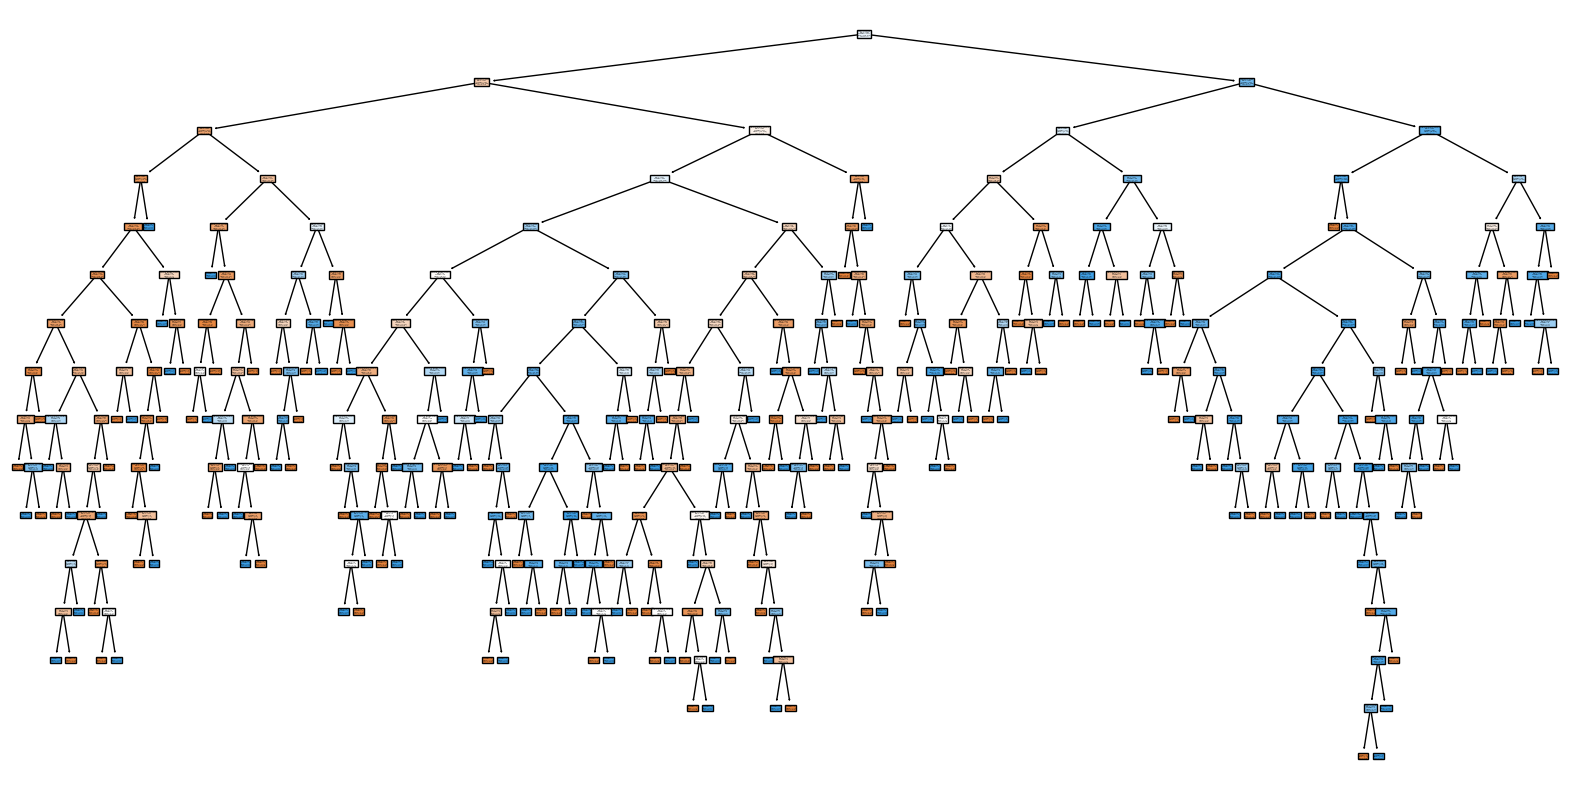

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plot_tree(dt, filled = True, feature_names = X.columns.tolist(), class_names = ['good', 'bad'])
plt.show()

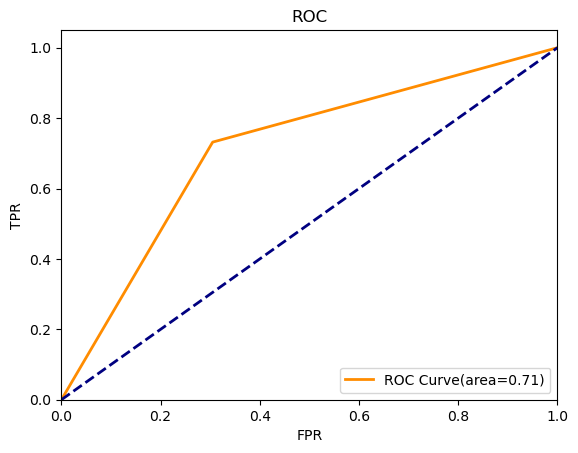

In [51]:
# ROC curve and AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(Y_test,dt_pred,pos_label=1)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

#### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
      n_estimators = 100, #number of trees
      criterion = 'gini', #or entropy
      max_depth = None,
      min_samples_split = 2,
      min_samples_leaf = 1,
      max_features = 'sqrt',
      bootstrap = True, #use bootstrap samples
      random_state = None
      )

In [53]:
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)

In [54]:
#calculating accuracy, precision and recall
accuracy_rf = accuracy_score(Y_test, rf_pred)
precision_rf = precision_score(Y_test, rf_pred)
recall_rf = recall_score(Y_test, rf_pred)

In [55]:
print('Accuracy:',accuracy_rf, 'Precision:', precision_rf, 'Recall:', recall_rf)

Accuracy: 0.7875 Precision: 0.8100558659217877 Recall: 0.8100558659217877


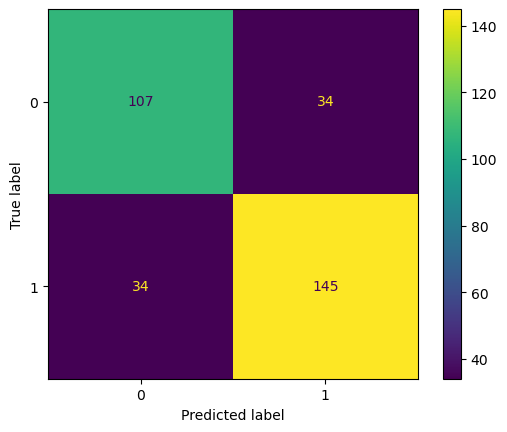

In [56]:
# confusion matrix
# 1- good, 0 - bad
cm_rf = confusion_matrix(Y_test, rf_pred)
cms_rf = ConfusionMatrixDisplay(cm_rf, display_labels = np.unique(Y).tolist())
cms_rf.plot()

In [57]:
#classification report
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       141
           1       0.81      0.81      0.81       179

    accuracy                           0.79       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.79      0.79      0.79       320



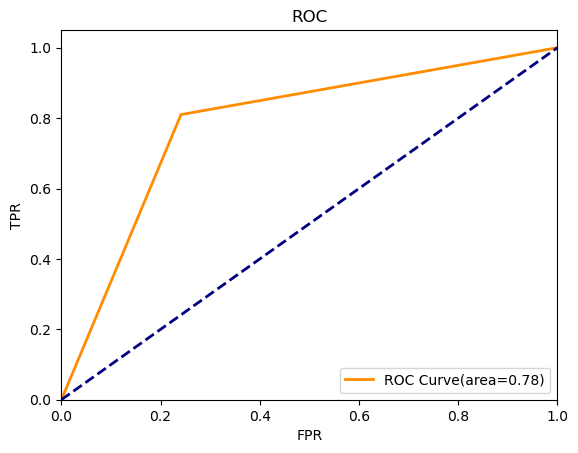

In [58]:
# ROC curve and AUC
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(Y_test,rf_pred,pos_label=1)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

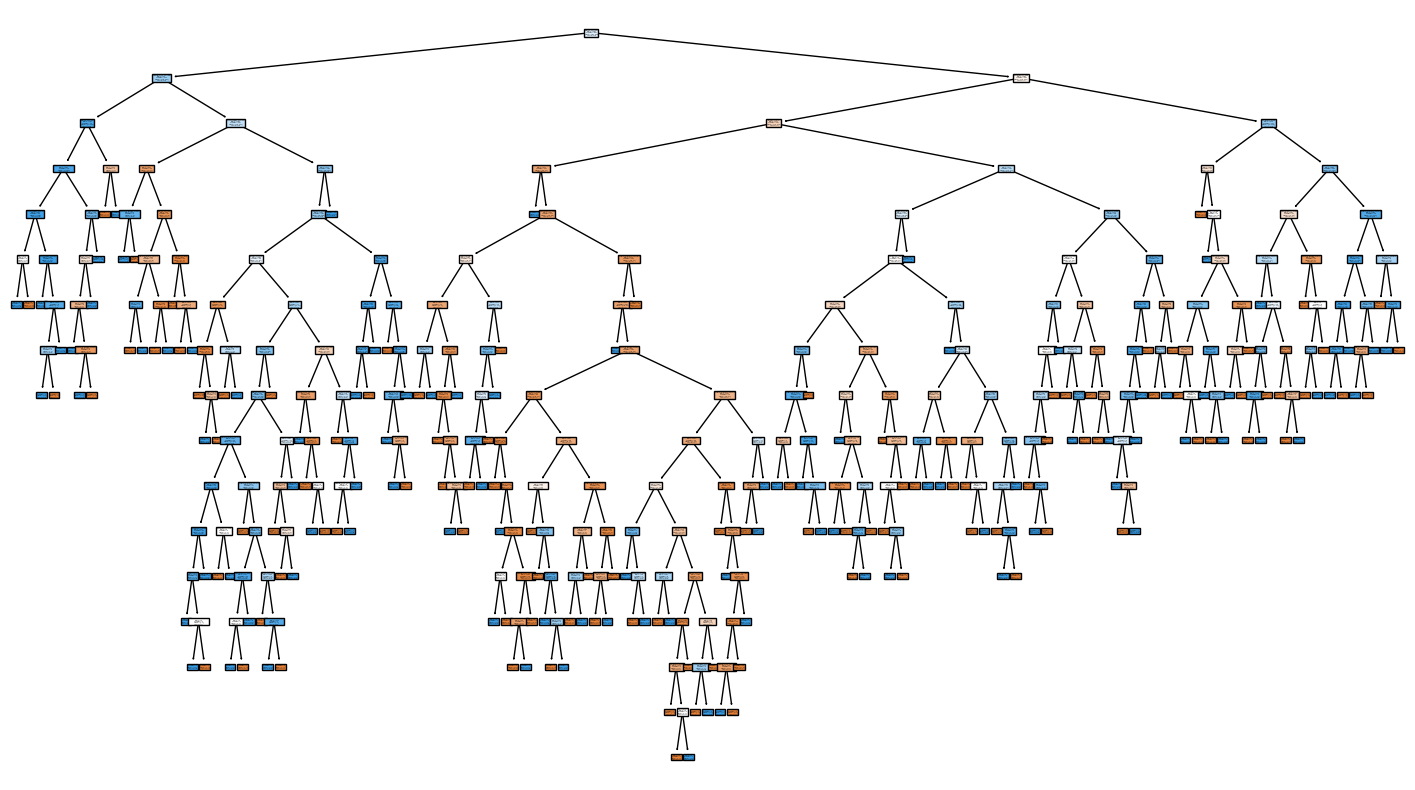

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(rf.estimators_[0],filled=True,feature_names=X_train.columns.tolist(),class_names=['bad', 'good'])
plt.show()

In [60]:
# feature importance scores by random forest
rf.feature_importances_

array([0.07213689, 0.10501899, 0.05971888, 0.0543439 , 0.07364153,
       0.05757314, 0.10505512, 0.09177819, 0.0683869 , 0.13422253,
       0.17812394])

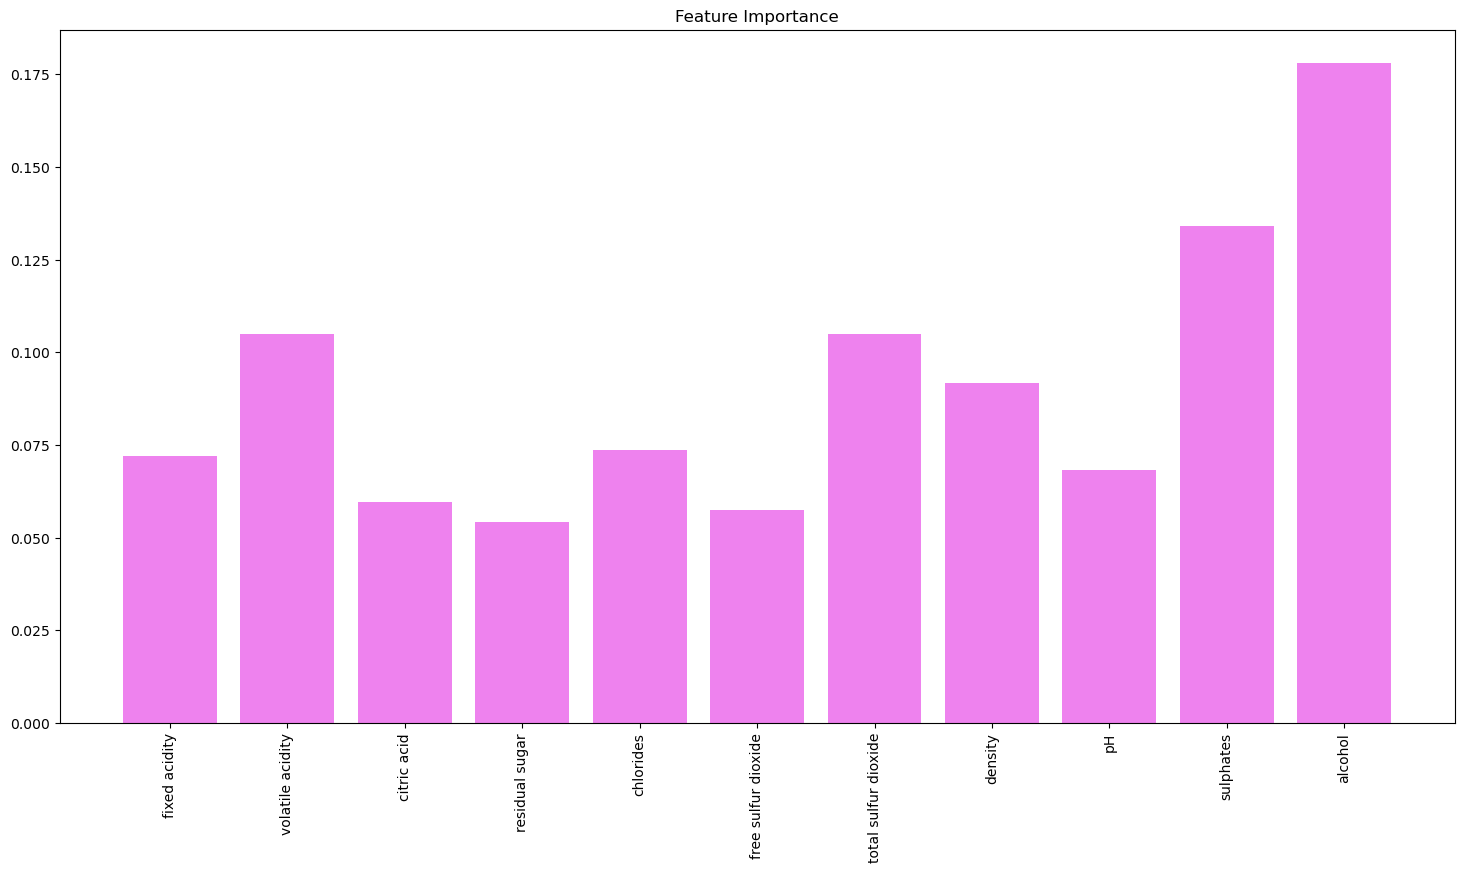

In [61]:
#plotting bar graph to represent feature imp.scores
plt.figure(figsize = (18,9))
plt.title('Feature Importance')
plt.bar(X.columns, rf.feature_importances_.tolist(), color = 'violet', align = 'center')
plt.xticks(rotation = 90)
plt.show()

In [62]:
# printing features in the order of their importance
X.columns[np.argsort(rf.feature_importances_).tolist()][::-1]

Index(['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity',
       'density', 'chlorides', 'fixed acidity', 'pH', 'citric acid',
       'free sulfur dioxide', 'residual sugar'],
      dtype='object')

#### Support Vector Machine

In [63]:
from sklearn.svm import SVC

In [64]:
svc = SVC(C = 1.0, 
         kernel = 'rbf', 
         degree = 3, 
         gamma = 'scale', 
         coef0 = 0.0, 
         shrinking = True, 
         probability = False, 
         tol = 1e-3, 
         cache_size = 200, 
         class_weight = None, 
         verbose = 0,
         max_iter = -1, 
         decision_function_shape = 'ovr', 
         break_ties = False, 
         random_state = None
         )

In [65]:
# data needs to be scaled before performing SVM
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [66]:
svc.fit(X_train_scaled,Y_train)
svc_pred=svc.predict(X_test_scaled)

In [67]:
#calculating accuracy, precision and recall
accuracy_svm = accuracy_score(Y_test, svc_pred)
precision_svm = precision_score(Y_test, svc_pred)
recall_svm = recall_score(Y_test, svc_pred)

In [68]:
print('Accuracy:',accuracy_svm, 'Precision:', precision_svm, 'Recall:', recall_svm)

Accuracy: 0.771875 Precision: 0.8117647058823529 Recall: 0.770949720670391


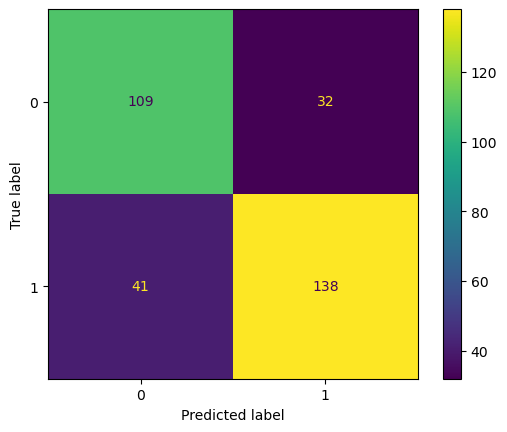

In [69]:
# confusion matrix
cm_svm = confusion_matrix(Y_test, svc_pred)
cms_svm = ConfusionMatrixDisplay(cm_svm, display_labels = np.unique(Y).tolist())
cms_svm.plot()

In [70]:
#classification report
print(classification_report(Y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       141
           1       0.81      0.77      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



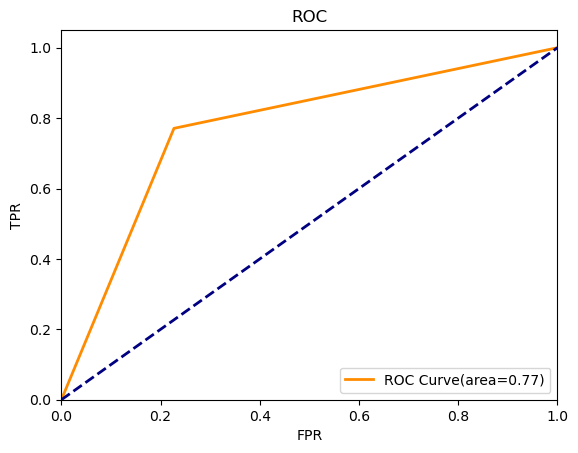

In [71]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(Y_test,svc_pred,pos_label=1)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [72]:
roc_auc

0.771999683030231

### Interpretation : Comparision of 4 classification models based on accuracy

Logistic Regression: 74.06%, Decision Tree: 72.18%, Random Forest: 79.37%, SVM: 77.18%

Random Forest Classifier yielded the highest accuracy. Since there is non-linearity between the target and few independant variables and it is a ensemble method, combining multiple decision trees, random forest got the highest accuracy

### Ensemble Methods

In [73]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, RandomForestClassifier

#### Boosting Classifier

In [74]:
gbclass = GradientBoostingClassifier(n_estimators = 100,
                                    learning_rate = 0.001,
                                    max_depth = 3,
                                    random_state = 0)

In [75]:
gbclass.fit(X_train_scaled, Y_train)

GradientBoostingClassifier(learning_rate=0.001, random_state=0)

In [76]:
y_pred_gb = gbclass.predict(X_test_scaled)

In [77]:
accuracy_boosting = accuracy_score(Y_test,y_pred_gb)
accuracy_boosting

0.69375

#### Stacking Classifier - Logistic Regression and Random Forest are the base models and Gradient Boosting is the meta model

In [78]:
base_models = [('rb', RandomForestClassifier(n_estimators = 100, random_state = 42)), ('lr', LogisticRegression())]

In [79]:
meta_model = GradientBoostingClassifier(n_estimators = 100,
                                    learning_rate = 0.001,
                                    max_depth = 3,
                                    random_state = 0)

In [80]:
stacking = StackingClassifier(estimators = base_models, final_estimator = meta_model)

In [81]:
stacking.fit(X_train_scaled,Y_train)

StackingClassifier(estimators=[('rb', RandomForestClassifier(random_state=42)),
                               ('lr', LogisticRegression())],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.001,
                                                              random_state=0))

In [82]:
y_pred_stack = stacking.predict(X_test_scaled)

In [83]:
accuracy_stack = accuracy_score(Y_test, y_pred_stack)
accuracy_stack

0.778125

#### Bagging Classifier

In [84]:
from sklearn.ensemble import BaggingClassifier

In [85]:
bag_model=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=50,
    bootstrap=True,
    oob_score=True,
    random_state=0
)

In [86]:
bag_model.fit(X_train_scaled,Y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=50,
                  n_estimators=100, oob_score=True, random_state=0)

In [87]:
y_pred_bag=bag_model.predict(X_test_scaled)
accuracy_bag = accuracy_score(Y_test,y_pred_bag)
accuracy_bag

0.740625

In [88]:
bag_model.oob_score_

0.7584050039093041

### Interpretation : Comparison of Bagging, Boosting and Stacking classifiers

Bagging : 74.06%
Stacking : 77.81%
Boosting : 69.37%
Stacking go the highest accuracy since Random Forest which got the higher accuracy is used as one of the base models. But the accuracy came out be little less than Random Forest Classifier

### Part - B: Dimensionality Reduction and Model Evaluation

#### Principal Component Analysis

In [89]:
from sklearn.decomposition import PCA

In [90]:
X_scaled = sc.fit_transform(X)

In [91]:
pca=PCA()
#scale the data 
pca.fit(X_scaled)

PCA()

In [92]:
# calculate cumulative sum of explained variance ratio
cumulative_variance=pca.explained_variance_ratio_.cumsum() 

In [93]:
# select the components with cumulative sum greater than 0.95
n_components=(cumulative_variance>=0.95).argmax()+1

In [94]:
n_components,cumulative_variance

(9,
 array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
        0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
        1.        ]))

In [95]:
pca=PCA(n_components=9)
pca.fit(X_scaled)

PCA(n_components=9)

In [96]:
prop_var=pca.explained_variance_ratio_

In [97]:
prop_var.shape

(9,)

In [98]:
pca.n_components_

9

In [99]:
PC_number=np.arange(pca.n_components_)+1

In [100]:
PC_number

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

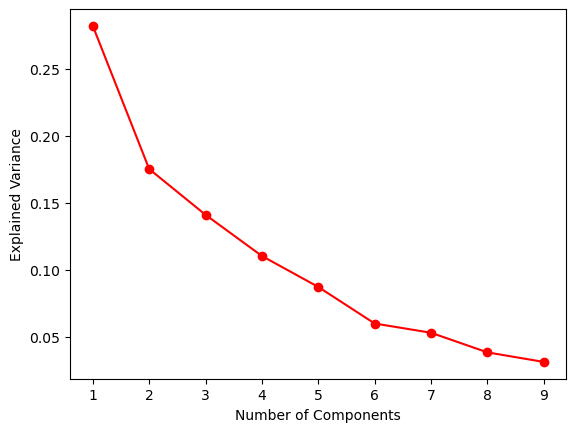

In [101]:
import matplotlib.pyplot as plt
plt.plot(PC_number,pca.explained_variance_ratio_,'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

From the graph, explained variance started decreasing when number of components is 2. So, perform PCA with 2 components

In [104]:
pca_model=PCA(n_components=2)
principalcomponents=pca_model.fit_transform(X_scaled)

In [105]:
principalcomponents

array([[-1.61952988,  0.45095009],
       [-0.79916993,  1.85655306],
       [-0.74847909,  0.88203886],
       ...,
       [-1.45612897,  0.31174559],
       [-2.27051793,  0.97979111],
       [-0.42697475, -0.53669021]])

In [106]:
principalcomponents.shape

(1599, 2)

In [107]:
principaldf=pd.DataFrame(data=principalcomponents,columns=['PC1','PC2'])

In [108]:
final_data=pd.concat([principaldf,Y],axis=1)

In [109]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC1      1599 non-null   float64
 1   PC2      1599 non-null   float64
 2   quality  1599 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 31.4 KB


<Axes: xlabel='PC1', ylabel='PC2'>

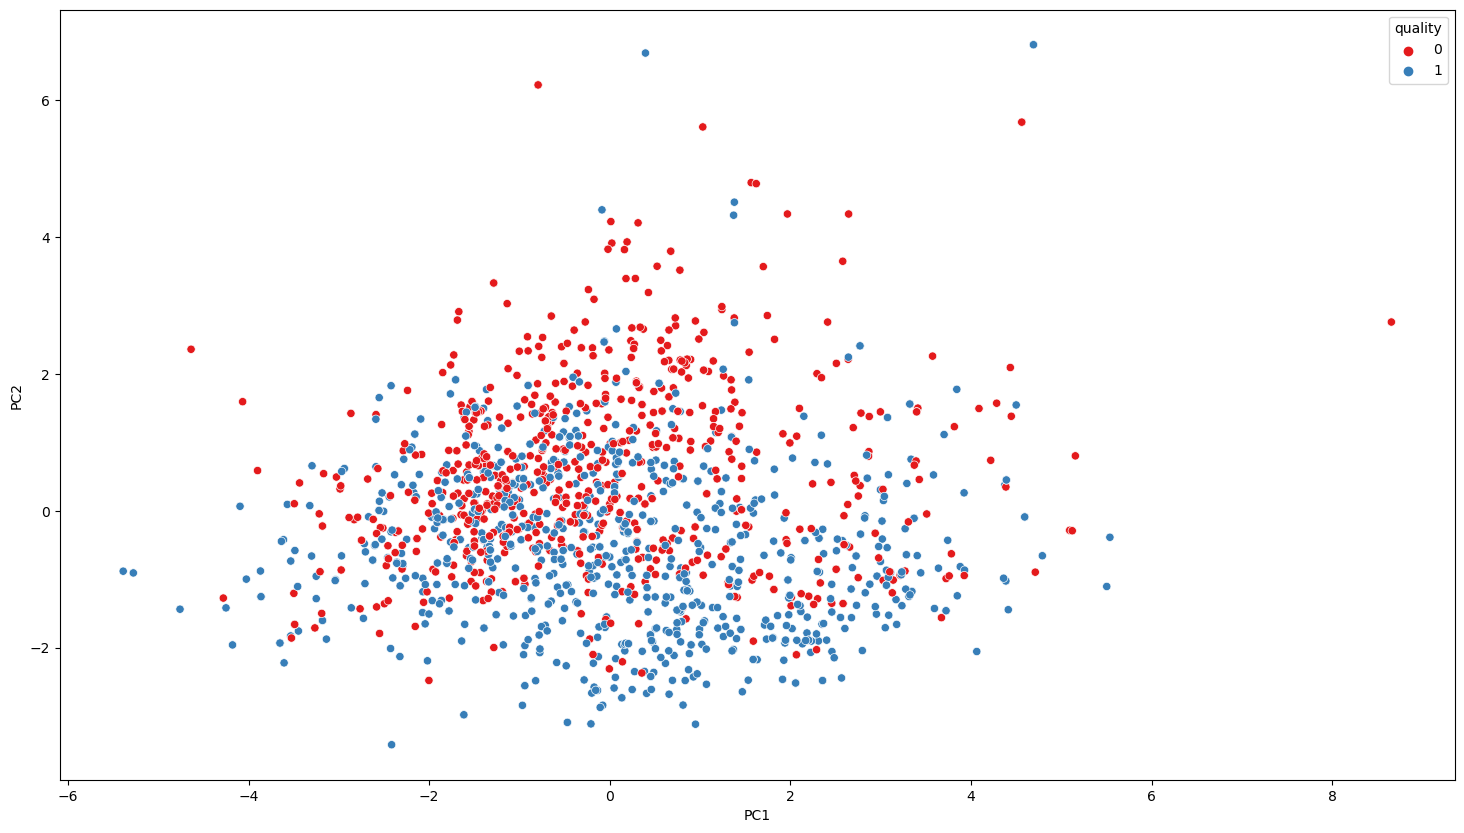

In [110]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.scatterplot(x='PC1',y='PC2',hue='quality',data=final_data,
                palette='Set1')

In [111]:
X_pca=final_data.drop('quality',axis=1)

In [112]:
y_encoded_pca=lbl.fit_transform(final_data['quality'])

In [113]:
#perform logistic regression with the reduced data
lr_model=LogisticRegression()

In [115]:
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,y_encoded_pca,
                                               test_size=0.2,
                                               random_state=42)

In [116]:
lr_model.fit(X_train,Y_train)

LogisticRegression()

In [117]:
y_pred_pca=lr_model.predict(X_test)

In [118]:
accuracy_pca = accuracy_score(Y_test,y_pred_pca)
accuracy_pca

0.659375

### t-SNE

In [120]:
from sklearn.manifold import TSNE

In [121]:
tsne_model=TSNE(n_components=2,perplexity=50,random_state=42)

In [122]:
tsne_data=tsne_model.fit_transform(X_scaled)

In [123]:
tsne_data.shape

(1599, 2)

In [124]:
df_tsne = pd.DataFrame()
df_tsne['label']=data['quality']
df_tsne['TSNE1']=tsne_data[:,0]
df_tsne['TSNE2']=tsne_data[:,1]

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

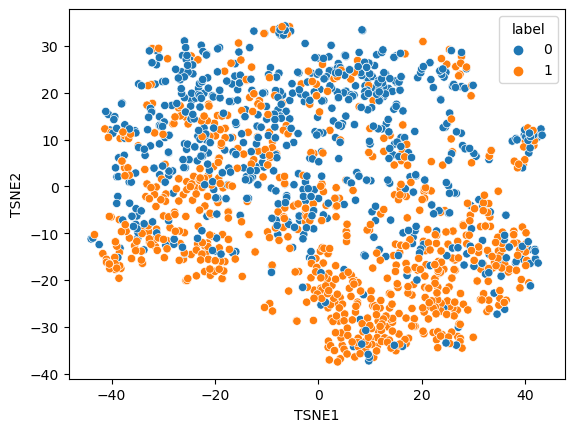

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='TSNE1',y='TSNE2',hue='label',data=df_tsne)

In [126]:
X_tsne=df_tsne.drop('label',axis=1)

In [127]:
y_encoded_tsne = lbl.fit_transform(df_tsne['label'])

In [128]:
lr_model=LogisticRegression()

In [129]:
X_train,X_test,Y_train,Y_test=train_test_split(X_tsne,y_encoded_tsne,
                                               test_size=0.2,
                                               random_state=42)

In [130]:
lr_model.fit(X_train,Y_train)

LogisticRegression()

In [131]:
y_pred_tsne=lr_model.predict(X_test)

In [132]:
accuracy_tsne = accuracy_score(Y_test,y_pred_tsne)
accuracy_tsne

0.690625

### Interpretation : Accuracy analysis after performing Dimensionality Reduction

Logisitc Regression accuracy before PCA : 77%, after PCA : 65.93%
Possible reasons for decrease in accuracy: PCA works by projecting the original features onto a lower-dimensional subspace defined by the principal components. In doing so, some information may be lost.
The loss of information would have caused decrease in accuracy.

Also, PCA assumes linear relationship among variables. Since there is non-linearity in our dataset, PCA performance would not have been efficient.
So, We performed t-SNE which imporved accuracy(69.06%). But, Logisitc Regression without t-SNE yielded more accuracy. This can be due to the multicollinearity among the few independant features.

### Part C: Advanced Neural Network Models

In [133]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

In [134]:
X = data.drop(['quality'], axis = 1)
Y = data['quality']

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y,test_size = 0.2,random_state = 42)

#### Multi-Layer Perceptron

In [138]:
from sklearn.neural_network import MLPClassifier

In [139]:
# define the model
mlp_model = MLPClassifier(hidden_layer_sizes = (8,6),
                         activation = 'tanh',
                         solver = 'adam',
                         alpha = 0.01,
                         learning_rate_init = 0.01,
                         max_iter = 1000,
                         random_state = 0)                                                                                                                                          

In [140]:
mlp_model.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(8, 6),
              learning_rate_init=0.01, max_iter=1000, random_state=0)

In [141]:
y_mlp_pred = mlp_model.predict(x_test)
y_mlp_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [142]:
from sklearn.metrics import accuracy_score
accuracy_mlp = accuracy_score(y_test, y_mlp_pred)
accuracy_mlp

0.753125

#### ANN

In [143]:
from keras.models import Sequential

In [144]:
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.regularizers import l1,l2

Building an ANN with one input layer, a hidden layer (l2 regularizer) and output layer with activation function as sigmoid since it is binary classification

In [145]:
model = Sequential()
model.add(Dense(units = 8, activation = 'relu', kernel_regularizer = l2(0.01), input_shape = (x_train.shape[1],)))
model.add(Dense(units = 6, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [147]:
from keras.callbacks import EarlyStopping

In [148]:
early_stopping = EarlyStopping(monitor = 'accuracy', patience = 10, verbose = 0) # accuracy or loss or val_accuracy or val_loss

In [149]:
history = model.fit(x_train,y_train,epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/100


32/32 [==============================] - 2s 12ms/step - loss: 0.8460 - accuracy: 0.5552 - val_loss: 0.8048 - val_accuracy: 0.5820
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8013 - accuracy: 0.6149 - val_loss: 0.7601 - val_accuracy: 0.6680
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7717 - accuracy: 0.6696 - val_loss: 0.7299 - val_accuracy: 0.7227
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7491 - accuracy: 0.7019 - val_loss: 0.7040 - val_accuracy: 0.7422
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7299 - accuracy: 0.7146 - val_loss: 0.6828 - val_accuracy: 0.7578
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7136 - accuracy: 0.7155 - val_loss: 0.6635 - val_accuracy: 0.7617
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.7243 - val_loss: 0.6462 - val_accuracy: 0.7812
Epoch 8/10

In [150]:
y_pred_ann = model.predict(x_test)

10/10 [==============================] - 0s 3ms/step


In [151]:
y_pred_ann

array([[0.36963946],
       [0.21486878],
       [0.53954273],
       [0.36669886],
       [0.6760877 ],
       [0.32149208],
       [0.13339347],
       [0.26388112],
       [0.67566425],
       [0.683145  ],
       [0.84745383],
       [0.36407962],
       [0.53654873],
       [0.3019568 ],
       [0.40220654],
       [0.9208644 ],
       [0.23092511],
       [0.53277695],
       [0.94846547],
       [0.291225  ],
       [0.32917196],
       [0.30926946],
       [0.73963386],
       [0.9218415 ],
       [0.38284594],
       [0.443679  ],
       [0.7029231 ],
       [0.37489432],
       [0.2655462 ],
       [0.7349009 ],
       [0.28289986],
       [0.40836328],
       [0.5871347 ],
       [0.37442   ],
       [0.46559912],
       [0.20656668],
       [0.9097356 ],
       [0.7111771 ],
       [0.5883482 ],
       [0.83158594],
       [0.58673507],
       [0.27716035],
       [0.82510436],
       [0.18599421],
       [0.7763092 ],
       [0.81508374],
       [0.911475  ],
       [0.565

In [152]:
loss, accuracy = model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7281


In [153]:
for i in range(len(mlp_model.coefs_)):
    print('Layer is ', i)
    print('Weight is '+str(mlp_model.coefs_[i]))
    print('Bias is '+str(mlp_model.intercepts_[i]))

Layer is  0
Weight is [[ 0.03644953  1.86530767 -0.24963438  0.2557286  -0.99434229  1.11531144
  -0.07211997  0.86244738]
 [-0.22300922 -1.1044427   0.25467358 -0.14958264 -0.87500673 -0.08550362
  -1.27363948  0.18272808]
 [-1.42467834 -0.17160495 -0.48797009  0.47653087  0.2479965   0.51258747
  -0.59136309  0.14057414]
 [-0.83978875  0.48374843 -0.72101034  1.60698941 -0.10158649 -0.25294473
  -0.44191655 -0.25285057]
 [-0.64780663  1.14609459  0.46382467  1.01797024  0.03650723  0.72323691
  -0.04691492 -0.35363637]
 [-0.50110961 -1.12084873 -0.06953978 -3.10135028  0.29689492  0.34337861
  -0.53680487  0.05562593]
 [ 0.63515926 -0.13439641  1.67786956  1.16596109  0.4467297  -2.7911325
  -0.37655263 -1.28538923]
 [ 0.18936907 -0.81866568  0.16766671 -0.46095829  1.04996673 -0.43256637
   0.57378452  0.38862166]
 [-0.40754616 -1.48005608  0.97768261 -0.12678879  1.3353886  -1.95100347
   0.98694852  1.37281854]
 [ 0.17620493 -0.11104308  0.37717228 -1.46624586 -0.56392217 -0.10484

In [154]:
#calculation of weight and bias of each layer
for layer in model.layers:
    print('Layer name is', layer.name)
    weights = layer.get_weights()
    print('Weights:', weights[0])
    print('Bias: ', weights[1])

Layer name is dense
Weights: [[ 6.82975799e-02  2.27318078e-01 -4.99451905e-02  1.13902107e-01
  -2.17588097e-02 -1.44562736e-01 -2.05515549e-02 -4.51031588e-02]
 [ 1.99289918e-02 -9.56685189e-03 -3.65808941e-02  2.17031628e-01
   1.11971654e-01  3.84098172e-01 -3.02060544e-01  6.88702464e-02]
 [-3.44525906e-03  2.14916065e-01  9.71524566e-02 -1.50148213e-01
  -9.66311619e-02  4.41266373e-02 -1.54863611e-01  6.30098302e-03]
 [-5.26499078e-02  3.82527616e-03 -5.76109020e-03  7.31686428e-02
  -1.15985401e-01 -1.80915326e-01 -8.24889988e-02 -7.66932294e-02]
 [ 4.91240844e-02 -1.55742288e-01  1.45312890e-01  1.10978447e-01
   8.13678801e-02  1.14718877e-01 -2.93558612e-02 -1.72344238e-01]
 [ 1.19586602e-01  1.94131639e-02  4.01754901e-02  9.66006964e-02
   1.21280387e-01  1.08958311e-01  1.51704967e-01 -2.43628100e-01]
 [ 7.89048374e-02 -1.80042610e-01  3.36517841e-01  1.83097363e-01
  -2.57852256e-01  3.96123737e-01 -1.39919654e-01 -1.51862457e-01]
 [ 4.62235737e-04 -1.88090727e-01  2.567

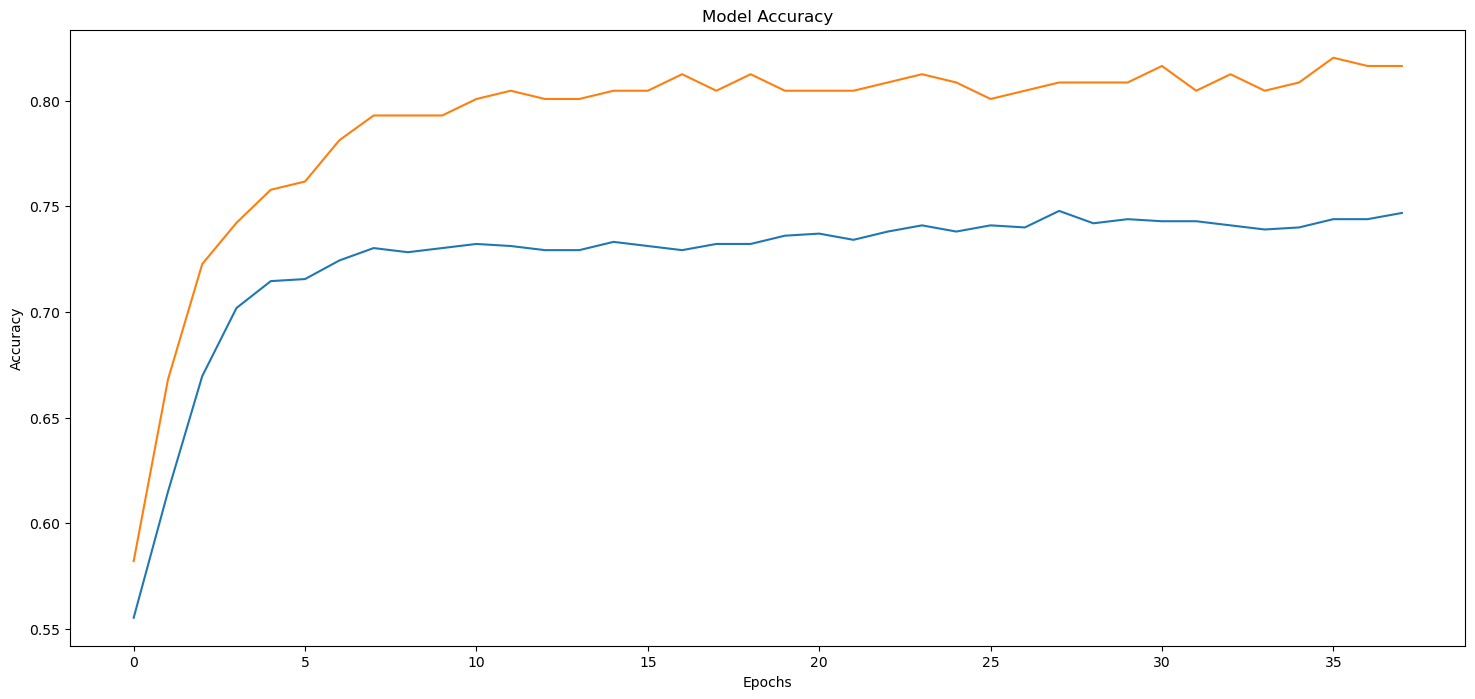

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,8))
#plt.subplot(1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [156]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [157]:
X.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [158]:
#predicting output for a new data
data_new = pd.DataFrame({'fixed acidity':[8.5],
                        'volatile acidity':[0.69],
                        'citric acid':[0.05],
                        'residual sugar':[2.0],
                        'chlorides':[0.0987],
                        'free sulfur dioxide':[7.5],
                        'total sulfur dioxide':[40.0],
                        'density':[0.8975],
                        'pH':[5.30],
                        'sulphates':[0.45],
                        'alcohol':[9.2]})

In [159]:
data_new_scaled = sc.fit_transform(data_new)

In [160]:
y_pred_new = mlp_model.predict(data_new_scaled)

In [161]:
y_pred_new

array([1])

In [162]:
if(y_pred_new[0]>0.5):
    print(1)
else:
    print(0)

1


#### Interpretation : Comparison of accuracies of MLP and ANN

MLP accuracy: 75.31%, ANN accuracy: 72.81%
MLP yielded best accuracy compared to ANN. ANN is best suitable for interpretation of images. There is no accuracy improvement because of insufficient data (ANN required more data to process). Also, Non-linear separability of the data can also be the reason

#### Convolutional Neural Netwokrs(CNN)

In [163]:
x_train.shape

(1279, 11)

In [164]:
# Reshape the data for CNN
X_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1, 1)
X_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1, 1)

In [165]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [166]:
# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(11, 1, 1)))
model_cnn.add(Conv2D(64, kernel_size=(3, 1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 1, 32)          128       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 1, 64)          6208      
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 1, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               24704     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                     

In [167]:
# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks = [early_stopping])

Epoch 1/100
32/32 [==============================] - 2s 13ms/step - loss: 0.6660 - accuracy: 0.5914 - val_loss: 0.5918 - val_accuracy: 0.6797
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5986 - accuracy: 0.6784 - val_loss: 0.5249 - val_accuracy: 0.7422
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5670 - accuracy: 0.7175 - val_loss: 0.5100 - val_accuracy: 0.7734
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5618 - accuracy: 0.7146 - val_loss: 0.4967 - val_accuracy: 0.7695
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5456 - accuracy: 0.7214 - val_loss: 0.4900 - val_accuracy: 0.7852
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7361 - val_loss: 0.4860 - val_accuracy: 0.7812
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5193 - accuracy: 0.7302 - val_loss: 0.4879 - val_accuracy: 0.7891
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2131 - accuracy: 0.9110 - val_loss: 0.5513 - val_accuracy: 0.7930
Epoch 60/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2023 - accuracy: 0.9277 - val_loss: 0.5928 - val_accuracy: 0.7773
Epoch 61/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1899 - accuracy: 0.9326 - val_loss: 0.5982 - val_accuracy: 0.7773
Epoch 62/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1781 - accuracy: 0.9394 - val_loss: 0.6392 - val_accuracy: 0.7695
Epoch 63/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2144 - accuracy: 0.9150 - val_loss: 0.5805 - val_accuracy: 0.8008
Epoch 64/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1776 - accuracy: 0.9453 - val_loss: 0.5628 - val_accuracy: 0.7852
Epoch 65/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1590 - accuracy: 0.9453 - val_loss: 0.5786 - val_accuracy: 0.7852
Epoch 

In [169]:
y_pred_cnn = model_cnn.predict(X_test_cnn)

10/10 [==============================] - 0s 4ms/step


In [170]:
# >0.5 - 1 and <0.5 - 0
y_pred_binary = (y_pred_cnn > 0.5).astype(int)

In [171]:
accuracy_cnn = accuracy_score(y_test, y_pred_binary)
accuracy_cnn

0.775

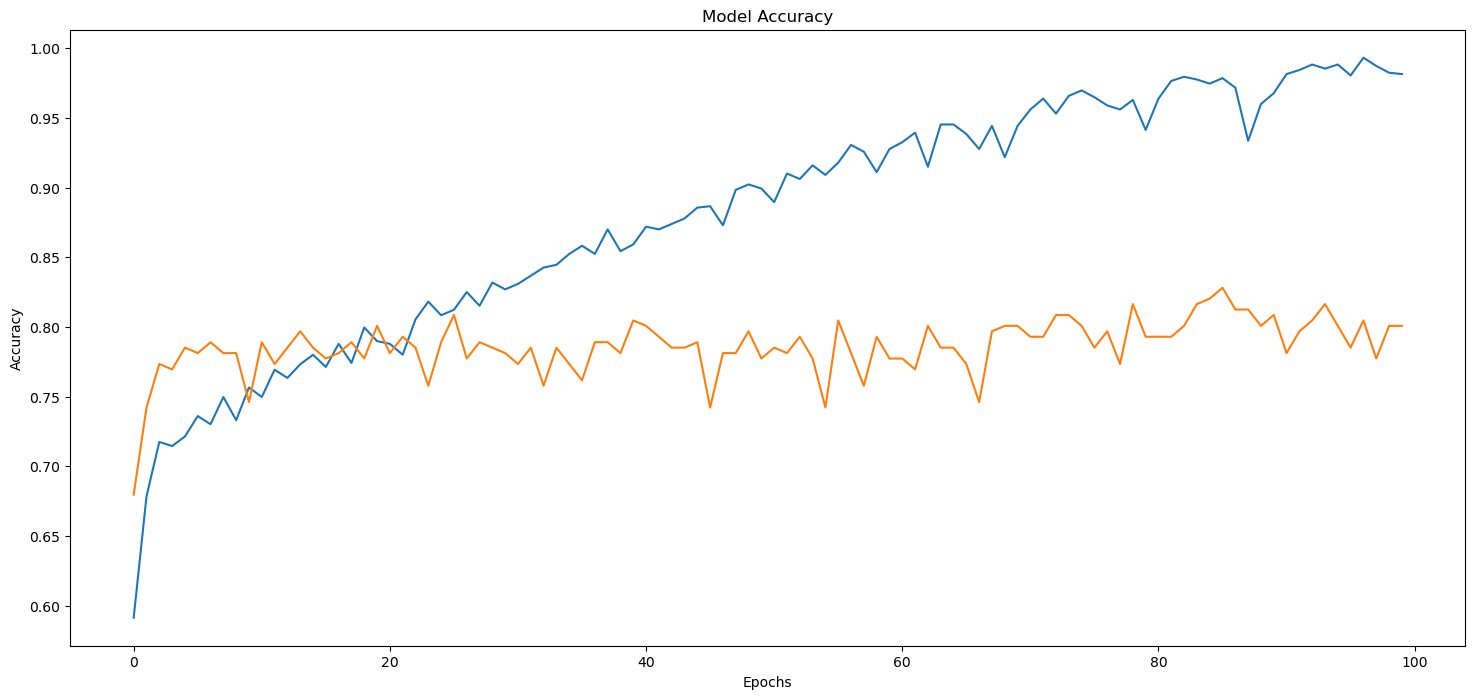

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,8))
#plt.subplot(1,2)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Interpretation : Accuracy of the CNN model is 77.7%. There is an improvement compared to ANN. Definitely, CNN is more complex and efficient network but it is more useful for image datasets. And in case of tabular data, CNN require large number of instances to perform efficiently. 

### Conclusion 

For the wine quality classification dataset, We implemented classification models - Logistic Regression, Decision Tree, Random Forest Classifier and SVM, ensemble techniques - Bagging, Stacking and Boosting, Neural network models - MLP, ANN and CNN. Random Forest classifier performed even compared to other ensemble and neural network models.
Since there is multi-collinearity among the independant variables in the dataset, we used Ridge regularizer to improve the performace of the models. Wine quality classification is useful in beverage businesses to efficiently classify wine as good or bad. 